In [43]:
%pylab inline
import numpy as np
import cv2
import json
from numpy.linalg import inv

Populating the interactive namespace from numpy and matplotlib


In [83]:
depth_file = '/playpen/haojiang/data/ML/yixin1/depth/000000.png'
pose_result = '/playpen/haojiang/code/openpose/test/000100_keypoints.json'
output_file = '/playpen/haojiang/data/ML/mfu/pose.csv'
depth_factor = 1000

In [70]:
def convert(depth_file, pose_result, output_file, depth_factor):
    #read depth image
    depth = cv2.imread(depth_file,2)/depth_factor
    intrinsic = np.array([[615.042,0,325.856],[0,615.252,234.405],[0,0,1]])
    inv_intrinsic = inv(intrinsic)
    with open(pose_result) as f:
        pose2d = json.load(f)['people'][0]['pose_keypoints_2d']
        pose2d = np.array(pose2d).reshape((25,3))
        pose2d = pose2d[:,:2].astype('int')
        d = depth[pose2d[:,1],pose2d[:,0]].reshape((25,1))
        pose3d = np.insert(pose2d,2,1,axis=1)
        pose3d=pose3d*d
        pose3d = np.dot(inv_intrinsic,pose3d.T).T
        np.savetxt(output_file, pose3d, delimiter=",")

In [89]:
for i in range(353):
    ind = '%06d' % (i+1)
    depth_file = '/playpen/haojiang/data/ML/yixin1/depth/'+ind+'.png'
    pose_result = '/playpen/haojiang/data/ML/yixin1/ori_pose/'+ind+'_keypoints.json'
    output_file = '/playpen/haojiang/data/ML/yixin1/pose/pose_'+ind+'.csv'
    convert(depth_file, pose_result, output_file, 1000)

IndexError: list index out of range

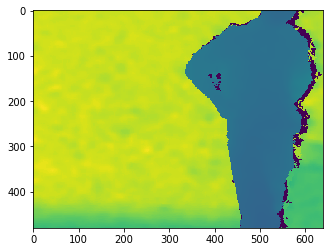

In [88]:
#read depth image
depth = cv2.imread(depth_file,2)/depth_factor
plt.imshow(depth)

In [68]:
intrinsic = np.array([[615.042,0,325.856],[0,615.252,234.405],[0,0,1]])
inv_intrinsic = inv(intrinsic)
print(intrinsic)

[[615.042   0.    325.856]
 [  0.    615.252 234.405]
 [  0.      0.      1.   ]]


In [77]:
import socket

In [80]:
HOST = 'hires-lambda1.cs.unc.edu'
PORT = 9192

In [81]:
with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.connect((HOST, PORT))
    s.sendall(b'Hello, world')
    data = s.recv(1024)

print('Received', repr(data))

ConnectionRefusedError: [Errno 111] Connection refused